# Data Preprocessing

## Import data 1 & Select dp001 data

In [63]:
import pandas as pd

data_raw1 = pd.read_csv("data1_edu_bigdata_imp.csv", encoding='latin-1')
#只有0~32是dp001平台的
columns_to_include = [i for i in range(32) if i not in [1, 2, 7, 18, 22, 24, 30]]
data1 = data_raw1.iloc[:, columns_to_include]

# Rename columns by adding "dp001_" prefix
data1 = data1.rename(columns=lambda x: x if data1.columns.get_loc(x) == 0 else 'dp001_' + str(x))

print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101730 entries, 0 to 101729
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   PseudoID                            101730 non-null  int64  
 1   dp001_video_item_sn                 101730 non-null  int64  
 2   dp001_question_sn                   52479 non-null   float64
 3   dp001_review_sn                     101730 non-null  int64  
 4   dp001_indicator                     101730 non-null  object 
 5   dp001_review_start_timestamp        101730 non-null  float64
 6   dp001_review_start_time             101730 non-null  object 
 7   dp001_review_end_timestamp          101730 non-null  float64
 8   dp001_review_end_time               101730 non-null  object 
 9   dp001_review_total_time             101730 non-null  float64
 10  dp001_review_finish_rate            101730 non-null  int64  
 11  dp001_exam_video_exam_sn  

/var/folders/m1/75z4x1mj5flgj2nm79ld720r0000gn/T/ipykernel_31526/4277393008.py:3: DtypeWarning: Columns (38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw1 = pd.read_csv("data1_edu_bigdata_imp.csv", encoding='latin-1')


## Import data2 & Select the same columns as data1

In [64]:
data_raw2 = pd.read_csv("data2_edu_bigdata_imp.csv", encoding='latin-1')
columns_to_include = [i for i in range(29) if i not in [0, 12, 20, 21]]
data2 = data_raw2.iloc[:, columns_to_include]
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251510 entries, 0 to 251509
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   PseudoID                            251510 non-null  int64  
 1   dp001_indicator                     170477 non-null  object 
 2   dp001_video_item_sn                 250936 non-null  float64
 3   dp001_question_sn                   170477 non-null  float64
 4   dp001_review_sn                     250936 non-null  float64
 5   dp001_review_start_timestamp        250936 non-null  float64
 6   dp001_review_start_time             250936 non-null  object 
 7   dp001_review_end_timestamp          251510 non-null  float64
 8   dp001_review_end_time               250936 non-null  object 
 9   dp001_review_total_time             250936 non-null  float64
 10  dp001_review_finish_rate            250936 non-null  float64
 11  dp001_exam_video_exam_sn  

/var/folders/m1/75z4x1mj5flgj2nm79ld720r0000gn/T/ipykernel_31526/2827345777.py:1: DtypeWarning: Columns (2,23,29,30,31,32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw2 = pd.read_csv("data2_edu_bigdata_imp.csv", encoding='latin-1')


## Reorder data1 & Merge the two data

In [65]:
# Get the column order from Data Frame 2
data2_columns = data2.columns

# Reorder Data Frame 1 columns to match Data Frame 2
data1 = data1.reindex(columns=data2_columns)

# Concatenate data1 and data2 along the rows (axis=0)
bigdata = pd.concat([data2, data1], ignore_index=True)

print(bigdata.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353240 entries, 0 to 353239
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   PseudoID                            353240 non-null  int64  
 1   dp001_indicator                     272207 non-null  object 
 2   dp001_video_item_sn                 352666 non-null  float64
 3   dp001_question_sn                   222956 non-null  float64
 4   dp001_review_sn                     352666 non-null  float64
 5   dp001_review_start_timestamp        352666 non-null  float64
 6   dp001_review_start_time             352666 non-null  object 
 7   dp001_review_end_timestamp          353240 non-null  float64
 8   dp001_review_end_time               352666 non-null  object 
 9   dp001_review_total_time             352666 non-null  float64
 10  dp001_review_finish_rate            352666 non-null  float64
 11  dp001_exam_video_exam_sn  

In [66]:
# Filter rows with no missing values in both columns
filtered_data = bigdata[bigdata["dp001_prac_during_time"].notna() & bigdata["dp001_exam_ans_time"].notna()]

# Count the number of rows
num_rows_no_missing = len(filtered_data)

# Count the number of unique PseudoID values
num_unique_pseudo_id = filtered_data["PseudoID"].nunique()

print(f"Number of rows with no missing values in both columns: {num_rows_no_missing}")
print(f"Number of unique PseudoID values in filtered data: {num_unique_pseudo_id}")

Number of rows with no missing values in both columns: 194788
Number of unique PseudoID values in filtered data: 258


In [67]:
# Drop rows with any missing values
rows_no_missing = bigdata.dropna(how='any')

# Count the number of rows
num_rows_no_missing = len(rows_no_missing)
num_unique_pseudo_id = rows_no_missing["PseudoID"].nunique()


print(f"Number of rows with no missing values across all columns: {num_rows_no_missing}")
print(f"Number of unique PseudoID values in filtered data: {num_unique_pseudo_id}")

Number of rows with no missing values across all columns: 151032
Number of unique PseudoID values in filtered data: 101


In [68]:
print("Number of users:")
print(len(bigdata["PseudoID"].unique()))
print(len(bigdata))
print(len(bigdata["PseudoID"]))

Number of users:
405
353240
353240


In [69]:
col_list = ['PseudoID', 'dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time', 'dp001_prac_date', 'dp001_review_start_time', 'dp001_prac_score_rate', 'dp001_exam_binary_res']

# dropna
selected_data = bigdata[col_list]
selected_data = selected_data.dropna()
print(selected_data.info())
research_data = selected_data

def getUniqueDf(research_data):
    # 計算重複行的數量
    duplicate_count = research_data.duplicated().sum()

    # 計算總行數
    total_rows = len(research_data)

    # 計算重複行的比例
    duplicate_ratio = duplicate_count / total_rows

    # 列印重複行數與比例
    print("Number of duplicate rows: ", duplicate_count)
    print("Ratio of duplicate rows: ", round(duplicate_ratio, 3))

    # 獲取唯一行的數量與資料
    unique_row_count = research_data[~research_data.duplicated(keep='first')].shape[0]
    print(f'Number of unique rows: {unique_row_count}') 

    # 獲取唯一行並重設索引
    unique_rows = research_data[~research_data.duplicated(keep='first')].reset_index(drop=True)

    # 顯示前 5 筆唯一行資料
    display(unique_rows.head())
    return unique_rows

unique_rows = getUniqueDf(research_data)


<class 'pandas.core.frame.DataFrame'>
Index: 194788 entries, 838 to 350340
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PseudoID                  194788 non-null  int64  
 1   dp001_review_total_time   194788 non-null  float64
 2   dp001_review_finish_rate  194788 non-null  float64
 3   dp001_prac_during_time    194788 non-null  float64
 4   dp001_prac_date           194788 non-null  object 
 5   dp001_review_start_time   194788 non-null  object 
 6   dp001_prac_score_rate     194788 non-null  float64
 7   dp001_exam_binary_res     194788 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 13.4+ MB
None
Number of duplicate rows:  192401
Ratio of duplicate rows:  0.988
Number of unique rows: 2387


,PseudoID,dp001_review_total_time,dp001_review_finish_rate,dp001_prac_during_time,dp001_prac_date,dp001_review_start_time,dp001_prac_score_rate,dp001_exam_binary_res
0,5,573.46,100.0,32.0,2022/9/28 21:20,2022-09-28 21:17:04,100.0,1.0
1,5,573.46,100.0,32.0,2022/9/28 21:20,2022-09-28 21:17:04,100.0,0.0
2,22,449.61,100.0,129.0,2022/9/15 21:16,2022-09-15 20:40:28,100.0,1.0
3,22,449.61,100.0,154.0,2022/9/15 21:23,2022-09-15 20:40:28,100.0,1.0
4,22,100.96,22.0,129.0,2022/9/15 21:16,2022-09-15 16:55:33,100.0,1.0


In [70]:
print('資料筆數: ', len(research_data))
unique_rows = getUniqueDf(research_data)
unique_rows.describe()
# 檢視唯一值及其出現次數
print('---最終學習成效---')
value_counts = unique_rows['dp001_exam_binary_res'].value_counts()
print("Value counts:")
print(value_counts)
print('---練習分數---')
value_counts = unique_rows['dp001_prac_score_rate'].value_counts()
print("Value counts:")
print(value_counts)

資料筆數:  194788
Number of duplicate rows:  192401
Ratio of duplicate rows:  0.988
Number of unique rows: 2387


,PseudoID,dp001_review_total_time,dp001_review_finish_rate,dp001_prac_during_time,dp001_prac_date,dp001_review_start_time,dp001_prac_score_rate,dp001_exam_binary_res
0,5,573.46,100.0,32.0,2022/9/28 21:20,2022-09-28 21:17:04,100.0,1.0
1,5,573.46,100.0,32.0,2022/9/28 21:20,2022-09-28 21:17:04,100.0,0.0
2,22,449.61,100.0,129.0,2022/9/15 21:16,2022-09-15 20:40:28,100.0,1.0
3,22,449.61,100.0,154.0,2022/9/15 21:23,2022-09-15 20:40:28,100.0,1.0
4,22,100.96,22.0,129.0,2022/9/15 21:16,2022-09-15 16:55:33,100.0,1.0


---最終學習成效---
Value counts:
dp001_exam_binary_res
1.0    1557
0.0     830
Name: count, dtype: int64
---練習分數---
Value counts:
dp001_prac_score_rate
100.0    1276
50.0      629
0.0       392
80.0       28
40.0       18
60.0       17
67.0       13
33.0        9
20.0        5
Name: count, dtype: int64


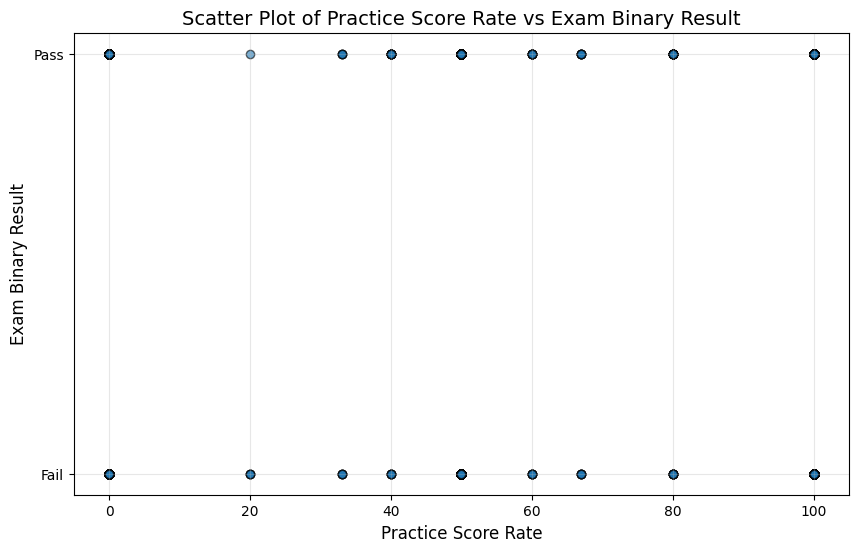

In [71]:
import matplotlib.pyplot as plt

# 繪製散佈圖
plt.figure(figsize=(10, 6))
plt.scatter(unique_rows['dp001_prac_score_rate'], unique_rows['dp001_exam_binary_res'], alpha=0.6, edgecolor='k')

# 圖表標籤與標題
plt.title("Scatter Plot of Practice Score Rate vs Exam Binary Result", fontsize=14)
plt.xlabel("Practice Score Rate", fontsize=12)
plt.ylabel("Exam Binary Result", fontsize=12)

# 調整視圖範圍（可選）
plt.xticks(fontsize=10)
plt.yticks([0, 1], ['Fail', 'Pass'], fontsize=10)  # Y 軸 0 和 1 標註
plt.grid(alpha=0.3)

# 顯示圖表
plt.show()

# RQ1

## Data Preprocessing for RQ1

*   dp001_review_total_time
*   dp001_review_finish_rate
*   dp001_prac_during_time
*   dp001_prac_date
*   dp001_review_start_time






In [72]:
q1_data = unique_rows[['PseudoID', 'dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time', 'dp001_prac_date', 'dp001_review_start_time', 'dp001_prac_score_rate']]

q1_data = q1_data.dropna()

q1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387 entries, 0 to 2386
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PseudoID                  2387 non-null   int64  
 1   dp001_review_total_time   2387 non-null   float64
 2   dp001_review_finish_rate  2387 non-null   float64
 3   dp001_prac_during_time    2387 non-null   float64
 4   dp001_prac_date           2387 non-null   object 
 5   dp001_review_start_time   2387 non-null   object 
 6   dp001_prac_score_rate     2387 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 130.7+ KB


In [73]:
# Function to parse and categorize time
def categorize_time(date_str):
    try:
        # Try to parse with seconds
        dt = pd.to_datetime(date_str, format='%Y/%m/%d %H:%M:%S')
    except ValueError:
        try:
            # Try to parse without seconds
            dt = pd.to_datetime(date_str, format='%Y/%m/%d %H:%M')
        except ValueError:
          try:
            dt = pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S')
          except ValueError:
            try:
              dt = pd.to_datetime(date_str, format='%Y-%m-%d %H:%M')
            except ValueError:
            # Return None or a custom category if parsing fails
              return None

    # Categorize the time
    if 6 <= dt.hour <= 11:
        return 'morning'
    elif 12 <= dt.hour <= 16:
        return 'afternoon'
    elif 17 <= dt.hour <= 23:
        return 'evening'
    else:
        return 'early morning'

# Apply the function to create the new category column
q1_data['dp001_prac_date_cat'] = q1_data['dp001_prac_date'].apply(categorize_time)

q1_data['dp001_review_start_time_cat'] = q1_data['dp001_review_start_time'].apply(categorize_time)

# Convert specific columns to category type
q1_data['dp001_prac_date_cat'] = q1_data['dp001_prac_date_cat'].astype('category')
q1_data['dp001_review_start_time_cat'] = q1_data['dp001_review_start_time_cat'].astype('category')

# Display the dataframe
print(q1_data['dp001_prac_date_cat'].unique())
print(q1_data['dp001_review_start_time_cat'].unique())

['evening', 'early morning', 'afternoon', 'morning']
Categories (4, object): ['afternoon', 'early morning', 'evening', 'morning']
['evening', 'afternoon', 'morning']
Categories (3, object): ['afternoon', 'evening', 'morning']


In [74]:
# Define a function to categorize scores
def categorize_score(rate):
    if rate >= 70:
        return 'high'
    elif 40 <= rate < 70:
        return 'medium'
    else:
        return 'low'

# Apply the categorization function
q1_data['dp001_prac_score_rate_cat'] = q1_data['dp001_prac_score_rate'].apply(categorize_score)
q1_data['dp001_prac_score_rate_cat'] = q1_data['dp001_prac_score_rate_cat'].astype('category')

q1_data['dp001_prac_score_rate_cat'].unique()

['high', 'medium', 'low']
Categories (3, object): ['high', 'low', 'medium']

In [75]:
# Group Size
print(q1_data['dp001_prac_date_cat'].value_counts())
print(q1_data['dp001_review_start_time_cat'].value_counts())
print(q1_data['dp001_prac_score_rate_cat'].value_counts())

dp001_prac_date_cat
morning          944
afternoon        912
evening          527
early morning      4
Name: count, dtype: int64
dp001_review_start_time_cat
morning      959
afternoon    861
evening      567
Name: count, dtype: int64
dp001_prac_score_rate_cat
high      1304
medium     677
low        406
Name: count, dtype: int64


In [76]:
# Drop the "early morning" group
q1_data = q1_data[q1_data['dp001_prac_date_cat'] != 'early morning']
# Remove unused categories
q1_data['dp001_prac_date_cat'] = q1_data['dp001_prac_date_cat'].cat.remove_unused_categories()

q1_data['dp001_prac_date_cat'].unique()


['evening', 'afternoon', 'morning']
Categories (3, object): ['afternoon', 'evening', 'morning']

## 1. 找出各個欄位(依變項)之間是否具有相關

### 時間點因素 (卡方檢定)

In [77]:
from scipy.stats import chi2_contingency

# Example: Create a contingency table
contingency_table = pd.crosstab(q1_data['dp001_prac_date_cat'], q1_data['dp001_review_start_time_cat'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.2f}")
print(f"Degrees of Freedom: {dof:.0f}")
print("\nExpected Frequencies:")
print(expected.round(2))

Contingency Table:
dp001_review_start_time_cat  afternoon  evening  morning
dp001_prac_date_cat                                     
afternoon                          714       86      112
evening                             81      439        7
morning                             66       38      840

Chi-Square Test Results:
Chi-Square Statistic: 2691.76
P-Value: 0.00
Degrees of Freedom: 4

Expected Frequencies:
[[329.51 215.47 367.02]
 [190.41 124.51 212.08]
 [341.08 223.03 379.9 ]]


In [78]:
contingency_table = pd.crosstab(q1_data['dp001_prac_date_cat'], q1_data['dp001_prac_score_rate_cat'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.2f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected.round(2))

Contingency Table:
dp001_prac_score_rate_cat  high  low  medium
dp001_prac_date_cat                         
afternoon                   513  145     254
evening                     304   84     139
morning                     485  175     284

Chi-Square Test Results:
Chi-Square Statistic: 7.28
P-Value: 0.12
Degrees of Freedom: 4

Expected Frequencies:
[[498.29 154.62 259.1 ]
 [287.94  89.34 149.72]
 [515.77 160.04 268.19]]


In [79]:
contingency_table = pd.crosstab(q1_data['dp001_review_start_time_cat'], q1_data['dp001_prac_score_rate_cat'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.2f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected.round(2))

Contingency Table:
dp001_prac_score_rate_cat    high  low  medium
dp001_review_start_time_cat                   
afternoon                     474  152     235
evening                       329   78     156
morning                       499  174     286

Chi-Square Test Results:
Chi-Square Statistic: 8.09
P-Value: 0.09
Degrees of Freedom: 4

Expected Frequencies:
[[470.42 145.97 244.61]
 [307.61  95.45 159.95]
 [523.97 162.58 272.45]]


### 影片觀看行為＆練習題目所花時長 (CCA)

In [80]:
from sklearn.preprocessing import StandardScaler

# Standardize dependent variables
scaler = StandardScaler()
q1_data[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']] = scaler.fit_transform(
    q1_data[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']]
)

In [81]:
# Select the specified columns
watch_set = q1_data.iloc[:, [1, 2]]
prac_set = q1_data.iloc[:, [3]]

In [82]:
print(watch_set.corr(), "\n")
print(prac_set.corr(), "\n")

# Combine the read_set and math_set into a single DataFrame for correlation calculation
combined_set = pd.concat([watch_set, prac_set], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_set.corr()

# Print the correlation matrix
print(correlation_matrix)

                          dp001_review_total_time  dp001_review_finish_rate
dp001_review_total_time                  1.000000                  0.437247
dp001_review_finish_rate                 0.437247                  1.000000 

                        dp001_prac_during_time
dp001_prac_during_time                     1.0 

                          dp001_review_total_time  dp001_review_finish_rate  \
dp001_review_total_time                  1.000000                  0.437247   
dp001_review_finish_rate                 0.437247                  1.000000   
dp001_prac_during_time                  -0.018385                 -0.003532   

                          dp001_prac_during_time  
dp001_review_total_time                -0.018385  
dp001_review_finish_rate               -0.003532  
dp001_prac_during_time                  1.000000  


In [83]:
from sklearn.cross_decomposition import CCA

# Create the CCA object
n_comp = min(watch_set.shape[1], prac_set.shape[1])
cca = CCA(n_components= n_comp)

# Fit the model
cca.fit(watch_set, prac_set)

# Transform the datasets
X_c, Y_c = cca.transform(watch_set, prac_set)

# Print the canonical weights
print("Canonical Weights:")
print("X :\n", cca.x_weights_)
print("Y:\n", cca.y_weights_)

Canonical Weights:
X :
 [[ 0.9660081 ]
 [-0.25851182]]
Y:
 [[-1.]]


Canonical correlations: 
 [0.02] 



<BarContainer object of 1 artists>

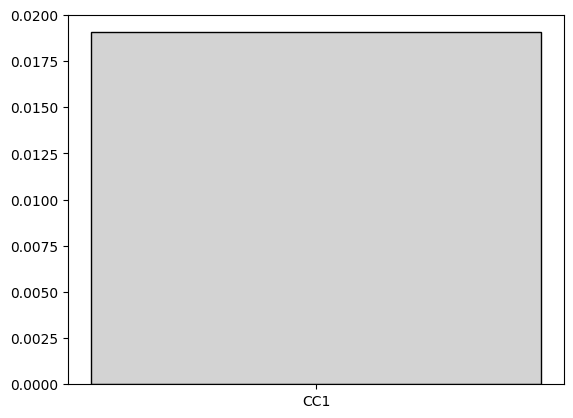

In [84]:
import numpy as np
import matplotlib.pyplot as plt

comp_corr = np.array([np.corrcoef(X_c[:, i], Y_c[:, i])[1][0] for i in range(n_comp)])
print("Canonical correlations: \n", comp_corr.round(2), "\n")
plt.bar(['CC1'], comp_corr, color='lightgrey', width=0.8, edgecolor='k')

In [85]:
# projection matrix: rotations
print("projection \n")
print("X:\n",cca.x_rotations_)
print("Y:\n",cca.y_rotations_,"\n")

# loadings
print("loadings \n")
print("X:\n",cca.x_loadings_)
print("Y:\n",cca.y_loadings_,"\n")

# coefficient to build the linear model
print("coefficient \n")
print("coefficient:\n",cca.coef_)
print("intercept:\n",cca.intercept_)

projection 

X:
 [[ 0.9660081 ]
 [-0.25851182]]
Y:
 [[-1.]] 

loadings 

X:
 [[1.09129427]
 [0.2096581 ]]
Y:
 [[-1.]] 

coefficient 

coefficient:
 [[-0.96621085  0.25856608]]
intercept:
 [4.47257282e-18]


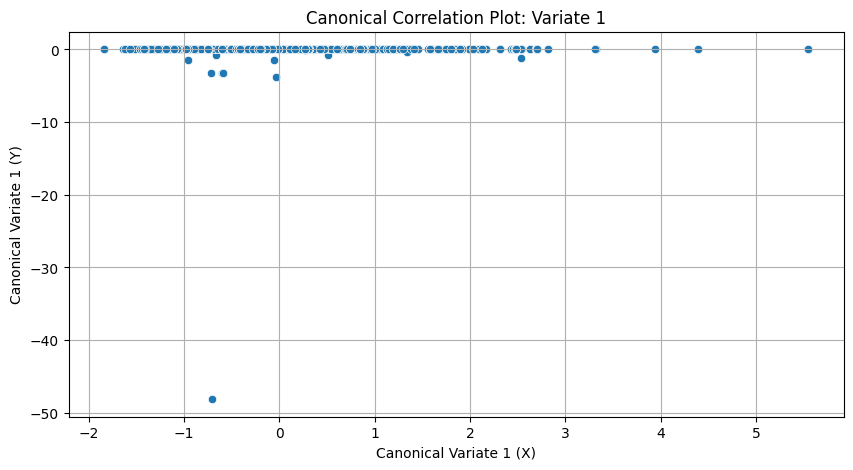

In [86]:
import seaborn as sns

# Create a DataFrame for plotting
canonical_df = pd.DataFrame({
  'X': X_c[:, 0],
  'Y': Y_c[:, 0]
})

# Plot Canonical Variate 1
plt.figure(figsize=(10, 5))
sns.scatterplot(data=canonical_df, x='X', y='Y')
plt.title('Canonical Correlation Plot: Variate 1')
plt.xlabel('Canonical Variate 1 (X)')
plt.ylabel('Canonical Variate 1 (Y)')
plt.grid(True)
plt.show()

## 2. 因素之間是否具有相關

### 時間點因素 vs 影片觀看行為 vs 練習題目所花時長 (MANOVA)

In [87]:
%pip install pingouin


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [88]:
# Zero Variance in Variables
print(q1_data.groupby('dp001_prac_date_cat')[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']].var())

print(q1_data.groupby('dp001_review_start_time_cat')[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']].var())

                     dp001_review_total_time  dp001_review_finish_rate  \
dp001_prac_date_cat                                                      
afternoon                           1.074869                  0.982175   
evening                             0.748224                  0.841092   
morning                             1.057013                  1.107319   

                     dp001_prac_during_time  
dp001_prac_date_cat                          
afternoon                          2.590570  
evening                            0.012245  
morning                            0.015159  
                             dp001_review_total_time  \
dp001_review_start_time_cat                            
afternoon                                   1.072158   
evening                                     0.811658   
morning                                     1.036009   

                             dp001_review_finish_rate  dp001_prac_during_time  
dp001_review_start_time_cat           

/var/folders/m1/75z4x1mj5flgj2nm79ld720r0000gn/T/ipykernel_31526/1334089412.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(q1_data.groupby('dp001_prac_date_cat')[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']].var())
/var/folders/m1/75z4x1mj5flgj2nm79ld720r0000gn/T/ipykernel_31526/1334089412.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(q1_data.groupby('dp001_review_start_time_cat')[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']].var())


In [89]:
# Multicollinearity
print(q1_data[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']].corr())

                          dp001_review_total_time  dp001_review_finish_rate  \
dp001_review_total_time                  1.000000                  0.437247   
dp001_review_finish_rate                 0.437247                  1.000000   
dp001_prac_during_time                  -0.018385                 -0.003532   

                          dp001_prac_during_time  
dp001_review_total_time                -0.018385  
dp001_review_finish_rate               -0.003532  
dp001_prac_during_time                  1.000000  


In [90]:
import pingouin as pg

# Perform Box's M test for “dp001_prac_date_cat”
box_m_test_g = pg.box_m(q1_data, dvs=['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time'],
group='dp001_prac_date_cat')
print("Box's M test for dp001_prac_date")
print(box_m_test_g)

Box's M test for dp001_prac_date
     Chi2    df  pval  equal_cov
box   inf  12.0   0.0      False


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/multivariate.py:386: RuntimeWarning: divide by zero encountered in log
  u = -2 * (1 - c) * np.log(M)


In [91]:
# Perform Box's M test for “dp001_review_start_time_cat”
box_m_test_e = pg.box_m(q1_data, dvs=['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time'],
group='dp001_review_start_time_cat')
print("\nBox's M test for dp001_review_start_time")
print(box_m_test_e)


Box's M test for dp001_review_start_time
     Chi2    df  pval  equal_cov
box   inf  12.0   0.0      False


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/multivariate.py:386: RuntimeWarning: divide by zero encountered in log
  u = -2 * (1 - c) * np.log(M)


In [92]:
# Perform Box's M test for "dp001_prac_score_rate_cat"
box_m_test_e = pg.box_m(q1_data, dvs=['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time'],
group='dp001_prac_score_rate_cat')
print("\nBox's M test for dp001_prac_score_rate")
print(box_m_test_e)


Box's M test for dp001_prac_score_rate
     Chi2    df  pval  equal_cov
box   inf  12.0   0.0      False


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/multivariate.py:386: RuntimeWarning: divide by zero encountered in log
  u = -2 * (1 - c) * np.log(M)


In [93]:
# Perform test for multivariate normality
from pingouin import multivariate_normality

# Split the dataset by dp001_prac_date_cat
FIX_G = q1_data.groupby('dp001_prac_date_cat')
morning_pdata = FIX_G.get_group('morning')
afternoon_pdata = FIX_G.get_group('afternoon')
evening_pdata = FIX_G.get_group('evening')

morning_pmntest = multivariate_normality(morning_pdata[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']], alpha=.05)
print(morning_pmntest)

afternoon_pmntest = multivariate_normality(afternoon_pdata[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']], alpha=.05)
print(afternoon_pmntest)

evening_pmntest = multivariate_normality(evening_pdata[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']], alpha=.05)
print(evening_pmntest)

# Split the dataset by dp001_review_start_time_cat
FIX_E = q1_data.groupby('dp001_review_start_time_cat')
morning_rdata = FIX_E.get_group('morning')
afternoon_rdata = FIX_E.get_group('afternoon')
evening_rdata = FIX_E.get_group('evening')

morning_rmntest = multivariate_normality(morning_rdata[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']], alpha=.05)
print(morning_rmntest)

afternoon_rmntest = multivariate_normality(afternoon_rdata[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']], alpha=.05)
print(afternoon_rmntest)

evening_rmntest = multivariate_normality(evening_rdata[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']], alpha=.05)
print(evening_rmntest)

HZResults(hz=185.61024212594012, pval=8.437463739713922e-305, normal=False)
HZResults(hz=170.56207935251578, pval=2.45650683227867e-292, normal=False)
HZResults(hz=113.62643912220051, pval=3.273074844012646e-213, normal=False)
HZResults(hz=185.74663521136836, pval=2.482183879313664e-306, normal=False)
HZResults(hz=168.1360684399676, pval=7.905181407995131e-286, normal=False)
HZResults(hz=116.19166028743331, pval=3.9871299813687093e-219, normal=False)


/var/folders/m1/75z4x1mj5flgj2nm79ld720r0000gn/T/ipykernel_31526/1378658182.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  FIX_G = q1_data.groupby('dp001_prac_date_cat')
/var/folders/m1/75z4x1mj5flgj2nm79ld720r0000gn/T/ipykernel_31526/1378658182.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  FIX_E = q1_data.groupby('dp001_review_start_time_cat')


In [94]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']
select_columns = ['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time', 'dp001_prac_score_rate', 'dp001_prac_date_cat', 'dp001_review_start_time_cat']

# Initialize the scaler
scaler = StandardScaler()

# Standardize the numeric columns
q1_data_standardized = q1_data[select_columns].copy()
q1_data_standardized[columns_to_standardize] = scaler.fit_transform(q1_data_standardized[columns_to_standardize]).round(2)

print(q1_data_standardized[columns_to_standardize].head())

means = scaler.mean_
std_devs = scaler.scale_

print("Means:", means.round(2))
print("Standard Deviations:", std_devs.round(2))


   dp001_review_total_time  dp001_review_finish_rate  dp001_prac_during_time
0                     1.19                      0.39                   -0.03
1                     1.19                      0.39                   -0.03
2                     0.54                      0.39                   -0.03
3                     0.54                      0.39                   -0.03
4                    -1.28                     -3.14                   -0.03
Means: [ 0. -0.  0.]
Standard Deviations: [1. 1. 1.]


In [95]:
from statsmodels.multivariate.manova import MANOVA

# Construct the MANOVA formula
formula = 'dp001_review_total_time + dp001_review_finish_rate + dp001_prac_during_time ~ dp001_prac_date_cat * dp001_review_start_time_cat '

# Perform MANOVA
manova_model = MANOVA.from_formula(formula, data=q1_data)
manova_results = manova_model.mv_test()

# Print summary of MANOVA results
print(manova_results)

                               Multivariate linear model
                                                                                        
---------------------------------------------------------------------------------------------
             Intercept             Value       Num DF        Den DF       F Value      Pr > F
---------------------------------------------------------------------------------------------
                Wilks' lambda      0.9978      3.0000      2372.0000       1.7510      0.1545
               Pillai's trace      0.0022      3.0000      2372.0000       1.7510      0.1545
       Hotelling-Lawley trace      0.0022      3.0000      2372.0000       1.7510      0.1545
          Roy's greatest root      0.0022      3.0000      2372.0000       1.7510      0.1545
----------------------------------------------------------------------------------------
                                                                                        
------------------

In [96]:
# Generalized Linear Models (GLMs)

import statsmodels.api as sm
import statsmodels.formula.api as smf

for var in ['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']:
    model = smf.ols(f'{var} ~ dp001_prac_date_cat * dp001_review_start_time_cat', data=q1_data).fit()
    print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     dp001_review_total_time   R-squared:                       0.020
Model:                                 OLS   Adj. R-squared:                  0.017
Method:                      Least Squares   F-statistic:                     6.162
Date:                     Tue, 24 Dec 2024   Prob (F-statistic):           6.78e-08
Time:                             11:14:48   Log-Likelihood:                -3356.8
No. Observations:                     2383   AIC:                             6732.
Df Residuals:                         2374   BIC:                             6784.
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------

### DDA

In [97]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']
select_columns = ['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time', 'dp001_prac_score_rate', 'dp001_prac_date_cat']

# Initialize the scaler
scaler = StandardScaler()

# Standardize the numeric columns
q1_data_standardized = q1_data[select_columns].copy()
q1_data_standardized[columns_to_standardize] = scaler.fit_transform(q1_data_standardized[columns_to_standardize]).round(2)

print(q1_data_standardized[columns_to_standardize].head())

means = scaler.mean_
std_devs = scaler.scale_

print("Means:", means.round(2))
print("Standard Deviations:", std_devs.round(2))


   dp001_review_total_time  dp001_review_finish_rate  dp001_prac_during_time
0                     1.19                      0.39                   -0.03
1                     1.19                      0.39                   -0.03
2                     0.54                      0.39                   -0.03
3                     0.54                      0.39                   -0.03
4                    -1.28                     -3.14                   -0.03
Means: [ 0. -0.  0.]
Standard Deviations: [1. 1. 1.]


In [98]:
from scipy import stats

# Define a custom function to compute descriptive statistics with skewness and kurtosis
def custom_agg(group):
  # Transpose the describe() output for alignment
  desc = group.describe().T # Transpose so that each variable is a row

  # Calculate skewness and kurtosis
  skewness = group.apply(stats.skew).rename("skewness")
  kurtosis = group.apply(stats.kurtosis).rename("kurtosis")

  # Concatenate the transposed descriptive stats with skewness and kurtosis
  return pd.concat([desc, skewness, kurtosis], axis=1)

grouped = q1_data_standardized.groupby('dp001_prac_date_cat')

# Apply the function to each group
descriptive_stats = grouped.apply(custom_agg)

print(descriptive_stats)

                                              count       mean        std  \
dp001_prac_date_cat                                                         
afternoon           dp001_review_total_time   912.0   0.094211   1.036647   
                    dp001_review_finish_rate  912.0  -0.007423   0.990045   
                    dp001_prac_during_time    912.0   0.039057   1.609595   
                    dp001_prac_score_rate     912.0  70.332237  37.163453   
evening             dp001_review_total_time   527.0  -0.039602   0.864826   
                    dp001_review_finish_rate  527.0   0.044649   0.916481   
                    dp001_prac_during_time    527.0  -0.020683   0.110879   
                    dp001_prac_score_rate     527.0  70.578748  37.122459   
morning             dp001_review_total_time   944.0  -0.068729   1.028122   
                    dp001_review_finish_rate  944.0  -0.023771   1.051529   
                    dp001_prac_during_time    944.0  -0.025975   0.123029   

/var/folders/m1/75z4x1mj5flgj2nm79ld720r0000gn/T/ipykernel_31526/114890877.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = q1_data_standardized.groupby('dp001_prac_date_cat')


In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X = q1_data_standardized[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']]
y = q1_data_standardized.loc[:, "dp001_prac_date_cat"]

# Initialize and fit the LDA model
lda_model = LDA()
lda_model.fit(X, y)

# Get the canonical variables
canonical_vars = lda_model.transform(X)

In [100]:
print("Canonical Scores:")
print(canonical_vars[:6].round(2),"...", "\n")

print("Intercept of 3 canonical functions:")
print(lda_model.intercept_.round(2), "\n")
print("Coefficients of 3 canonical functions:")
print(lda_model.coef_.round(2), "\n")
print("Explained Variance Ratio:")
print(lda_model.explained_variance_ratio_.round(2), "\n")

Canonical Scores:
[[-1.04 -0.41]
 [-1.04 -0.41]
 [-0.36 -0.4 ]
 [-0.36 -0.4 ]
 [-0.23  3.13]
 [-0.23  3.13]] ... 

Intercept of 3 canonical functions:
[-0.97 -1.51 -0.93] 

Coefficients of 3 canonical functions:
[[ 0.12 -0.06  0.04]
 [-0.08  0.08 -0.02]
 [-0.07  0.01 -0.03]] 

Explained Variance Ratio:
[0.92 0.08] 



In [101]:
# Make predictions
lda_values = lda_model.predict(X)
lda_proba = lda_model.predict_proba(X)

# Create a DataFrame to store the predictions
lda_results = pd.DataFrame({
  'Predicted_Group': lda_values,
  'Predicted_Probability': [prob.round(3) for prob in lda_proba] # Probabilities for each class
})

# Add the predictions to the original DataFrame
q1_data_with_predictions = q1_data_standardized.copy()
q1_data_with_predictions = pd.concat([q1_data_with_predictions, lda_results], axis=1)

# Display the first few rows
print("\nFirst few rows of predictions:")
print(q1_data_with_predictions.head())


First few rows of predictions:
   dp001_review_total_time  dp001_review_finish_rate  dp001_prac_during_time  \
0                     1.19                      0.39                   -0.03   
1                     1.19                      0.39                   -0.03   
2                     0.54                      0.39                   -0.03   
3                     0.54                      0.39                   -0.03   
4                    -1.28                     -3.14                   -0.03   

   dp001_prac_score_rate dp001_prac_date_cat Predicted_Group  \
0                  100.0             evening       afternoon   
1                  100.0             evening       afternoon   
2                  100.0             evening       afternoon   
3                  100.0             evening       afternoon   
4                  100.0             evening         morning   

   Predicted_Probability  
0  [0.429, 0.208, 0.363]  
1  [0.429, 0.208, 0.363]  
2  [0.398, 0.219, 0.3

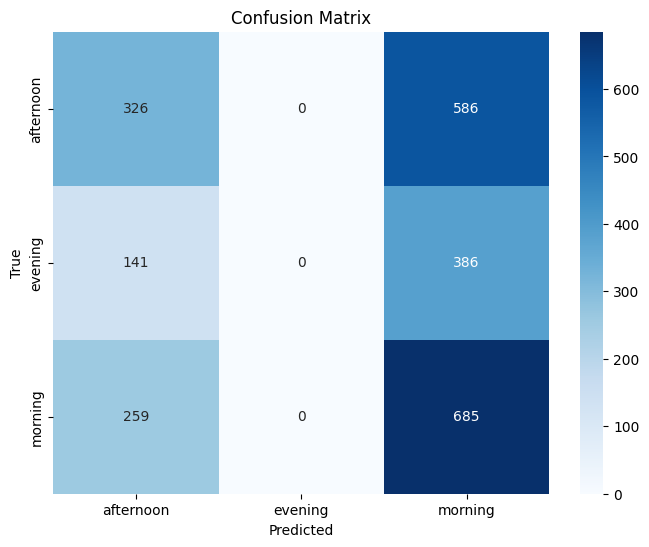


Accuracy Rate:
0.42425514057910196

Classification Report:
              precision    recall  f1-score   support

   afternoon       0.45      0.36      0.40       912
     evening       0.00      0.00      0.00       527
     morning       0.41      0.73      0.53       944

    accuracy                           0.42      2383
   macro avg       0.29      0.36      0.31      2383
weighted avg       0.34      0.42      0.36      2383



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

conf_matrix = confusion_matrix(y, lda_values, labels=lda_model.classes_)
accuracy = accuracy_score(y, lda_values)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=lda_model.classes_, yticklabels=lda_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("\nAccuracy Rate:")
print(accuracy)

# Generate classification report
report = classification_report(y, lda_values)
print("\nClassification Report:")
print(report)

dp001_review_start_time_cat

In [103]:
columns_to_standardize = ['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']
select_columns = ['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time', 'dp001_prac_score_rate', 'dp001_review_start_time_cat']

# Initialize the scaler
scaler = StandardScaler()

# Standardize the numeric columns
q1_data_standardized = q1_data[select_columns].copy()
q1_data_standardized[columns_to_standardize] = scaler.fit_transform(q1_data_standardized[columns_to_standardize]).round(2)

print(q1_data_standardized[columns_to_standardize].head())

means = scaler.mean_
std_devs = scaler.scale_

print("Means:", means.round(2))
print("Standard Deviations:", std_devs.round(2))

   dp001_review_total_time  dp001_review_finish_rate  dp001_prac_during_time
0                     1.19                      0.39                   -0.03
1                     1.19                      0.39                   -0.03
2                     0.54                      0.39                   -0.03
3                     0.54                      0.39                   -0.03
4                    -1.28                     -3.14                   -0.03
Means: [ 0. -0.  0.]
Standard Deviations: [1. 1. 1.]


In [104]:
X = q1_data_standardized[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']]
y = q1_data_standardized.loc[:, "dp001_review_start_time_cat"]

# Initialize and fit the LDA model
lda_model = LDA()
lda_model.fit(X, y)

# Get the canonical variables
canonical_vars = lda_model.transform(X)

print("Canonical Scores:")
print(canonical_vars[:6].round(2),"...", "\n")
print("Intercept of 3 canonical functions:")
print(lda_model.intercept_.round(2), "\n")
print("Coefficients of 3 canonical functions:")
print(lda_model.coef_.round(2), "\n")
print("Explained Variance Ratio:")
print(lda_model.explained_variance_ratio_.round(2), "\n")

Canonical Scores:
[[ 1.05 -0.45]
 [ 1.05 -0.45]
 [ 0.57 -0.01]
 [ 0.57 -0.01]
 [-2.27 -1.81]
 [-2.27 -1.81]] ... 

Intercept of 3 canonical functions:
[-1.02 -1.45 -0.91] 

Coefficients of 3 canonical functions:
[[ 0.04 -0.06  0.04]
 [ 0.07  0.08 -0.01]
 [-0.08  0.   -0.02]] 

Explained Variance Ratio:
[0.71 0.29] 



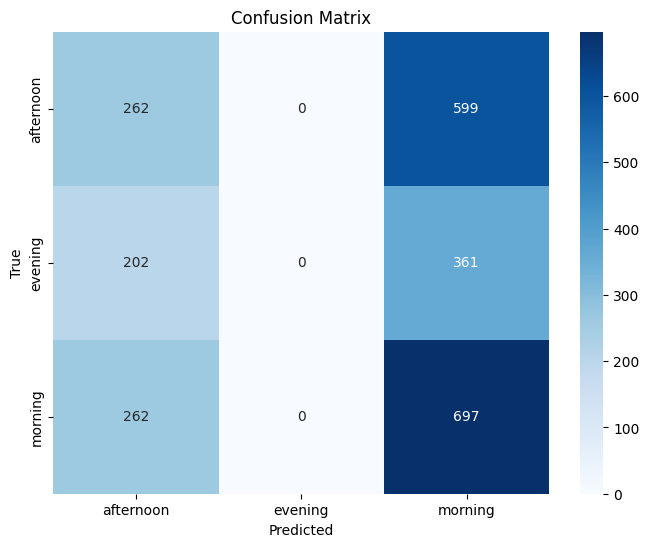


Accuracy Rate:
0.402

Classification Report:
              precision    recall  f1-score   support

   afternoon       0.36      0.30      0.33       861
     evening       0.00      0.00      0.00       563
     morning       0.42      0.73      0.53       959

    accuracy                           0.40      2383
   macro avg       0.26      0.34      0.29      2383
weighted avg       0.30      0.40      0.33      2383



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [105]:
conf_matrix = confusion_matrix(y, lda_values, labels=lda_model.classes_)
accuracy = accuracy_score(y, lda_values)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=lda_model.classes_, yticklabels=lda_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("\nAccuracy Rate:")
print(accuracy.round(3))

# Generate classification report
report = classification_report(y, lda_values)
print("\nClassification Report:")
print(report)

/var/folders/m1/75z4x1mj5flgj2nm79ld720r0000gn/T/ipykernel_31526/2314971523.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = canonical_df.groupby('Group')[['DF1', 'DF2']].mean()


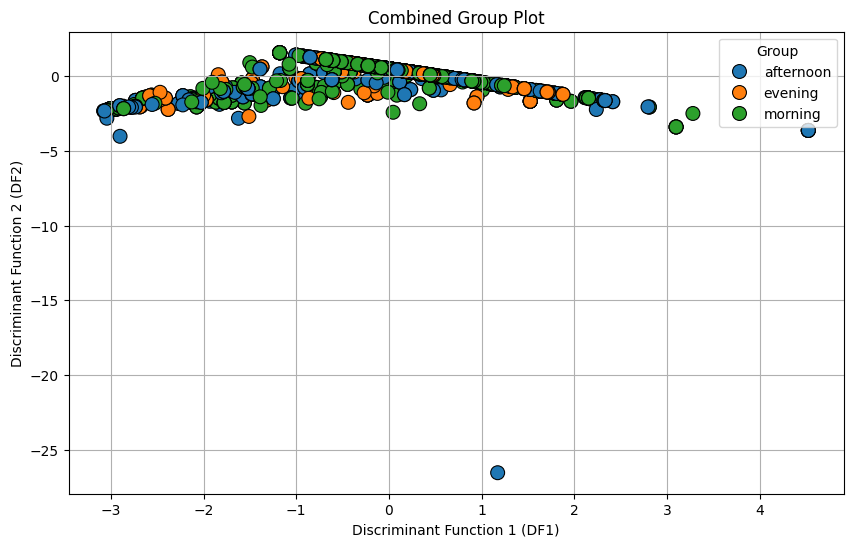

In [106]:
# Convert the canonical variables to a DataFrame
canonical_df = pd.DataFrame(canonical_vars, columns=['DF1', 'DF2'])
canonical_df['Group'] = y.values

# Calculate group means
group_means = canonical_df.groupby('Group')[['DF1', 'DF2']].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=canonical_df, x='DF1', y='DF2', hue='Group', s=100, edgecolor="k")

# Add plot details
plt.title('Combined Group Plot')
plt.xlabel('Discriminant Function 1 (DF1)')
plt.ylabel('Discriminant Function 2 (DF2)')
plt.legend(title='Group')
plt.grid(True)
plt.show()

Correlation Matrix:
                          dp001_review_total_time  dp001_review_finish_rate  \
dp001_review_total_time                  1.000000                  0.437247   
dp001_review_finish_rate                 0.437247                  1.000000   
dp001_prac_during_time                  -0.018385                 -0.003532   

                          dp001_prac_during_time  
dp001_review_total_time                -0.018385  
dp001_review_finish_rate               -0.003532  
dp001_prac_during_time                  1.000000  


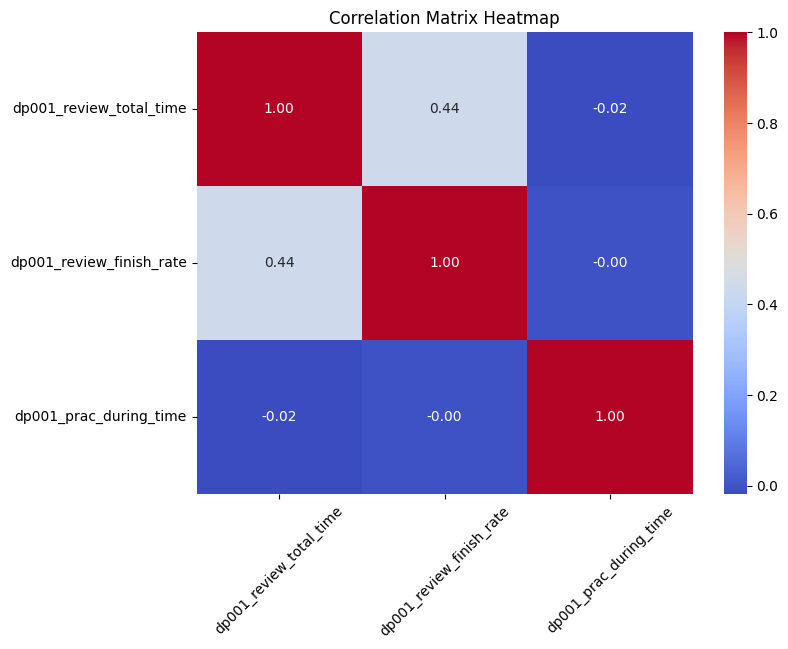

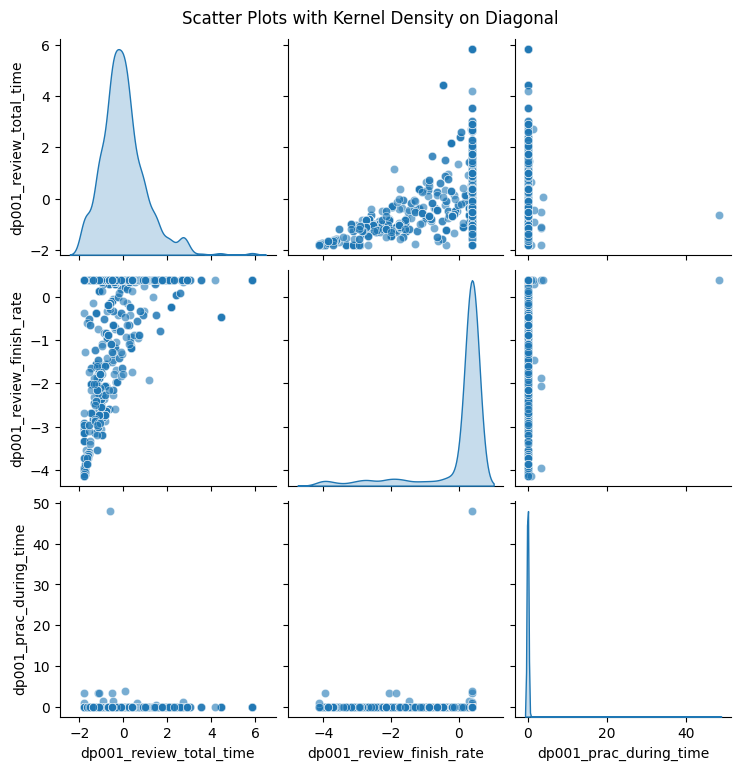

In [107]:
# Calculate the correlation matrix
correlation_matrix = q1_data[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)  # Tilt the x-axis labels by 45 degrees
plt.yticks(rotation=0)   # Ensure y-axis labels are horizontal
plt.show()

# Pairwise scatter plots
sns.pairplot(
    q1_data,
    vars=['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time'],
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
plt.suptitle('Scatter Plots with Kernel Density on Diagonal', y=1.02)
plt.show()

Correlation Matrix:
                          dp001_prac_score_rate  dp001_review_total_time  \
dp001_prac_score_rate                  1.000000                 0.028510   
dp001_review_total_time                0.028510                 1.000000   
dp001_review_finish_rate               0.030786                 0.437247   
dp001_prac_during_time                 0.017461                -0.018385   

                          dp001_review_finish_rate  dp001_prac_during_time  
dp001_prac_score_rate                     0.030786                0.017461  
dp001_review_total_time                   0.437247               -0.018385  
dp001_review_finish_rate                  1.000000               -0.003532  
dp001_prac_during_time                   -0.003532                1.000000  


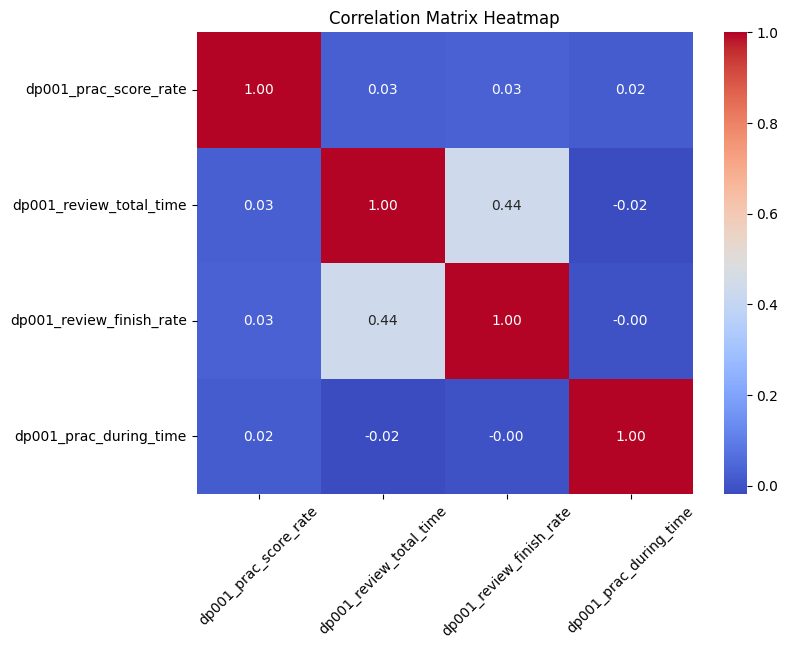

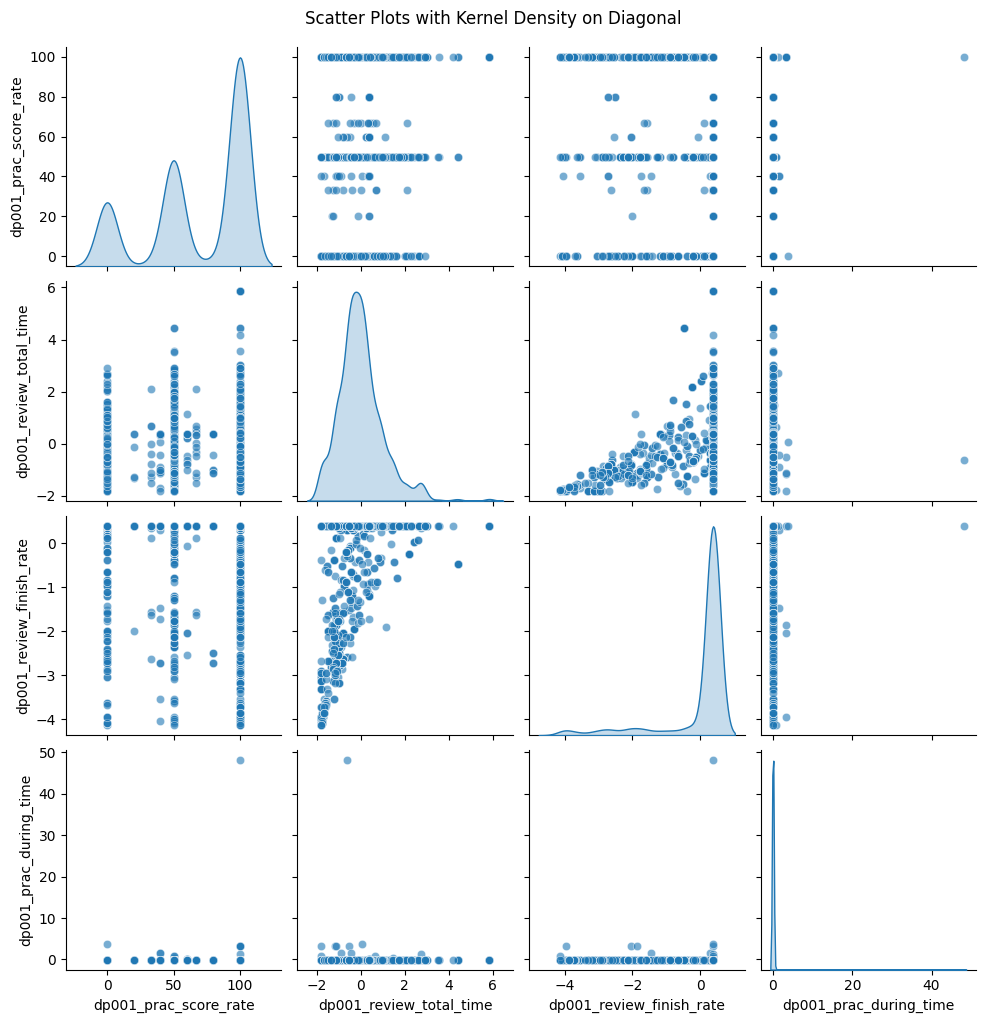

In [108]:
# Calculate the correlation matrix
correlation_matrix = q1_data[['dp001_prac_score_rate', 'dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)  # Tilt the x-axis labels by 45 degrees
plt.yticks(rotation=0)   # Ensure y-axis labels are horizontal
plt.show()

# Pairwise scatter plots
sns.pairplot(
    q1_data,
    vars=['dp001_prac_score_rate', 'dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time'],
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
plt.suptitle('Scatter Plots with Kernel Density on Diagonal', y=1.02)
plt.show()


## 3. 找出關鍵因素 (Random Forest)

In [109]:
# One-hot encode 'dp001_prac_date_cat' and 'dp001_review_start_time_cat'
q1_data = pd.get_dummies(
    q1_data, 
    columns=['dp001_prac_date_cat', 'dp001_review_start_time_cat'], 
    prefix=['prac_date', 'review_start_time']
)

In [110]:
q1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2383 entries, 0 to 2386
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   PseudoID                     2383 non-null   int64   
 1   dp001_review_total_time      2383 non-null   float64 
 2   dp001_review_finish_rate     2383 non-null   float64 
 3   dp001_prac_during_time       2383 non-null   float64 
 4   dp001_prac_date              2383 non-null   object  
 5   dp001_review_start_time      2383 non-null   object  
 6   dp001_prac_score_rate        2383 non-null   float64 
 7   dp001_prac_score_rate_cat    2383 non-null   category
 8   prac_date_afternoon          2383 non-null   bool    
 9   prac_date_evening            2383 non-null   bool    
 10  prac_date_morning            2383 non-null   bool    
 11  review_start_time_afternoon  2383 non-null   bool    
 12  review_start_time_evening    2383 non-null   bool    
 13  review_s

In [111]:
from sklearn.model_selection import train_test_split

rf1_data = q1_data.copy()

# Splitting into training and testing sets
train, test = train_test_split(rf1_data, test_size=0.2, random_state=2024)

# Display class distribution
print("Training Set:")
print(train['dp001_prac_score_rate_cat'].value_counts())
print("\nTesting Set:")
print(test['dp001_prac_score_rate_cat'].value_counts())

# Define features and target
X_train = train[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time', 'prac_date_afternoon', 'prac_date_evening', 'prac_date_morning', 'review_start_time_afternoon', 'review_start_time_evening', 'review_start_time_morning']]
y_train = train['dp001_prac_score_rate_cat']
X_test = test[['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time', 'prac_date_afternoon', 'prac_date_evening', 'prac_date_morning', 'review_start_time_afternoon', 'review_start_time_evening', 'review_start_time_morning']]
y_test = test['dp001_prac_score_rate_cat']

Training Set:
dp001_prac_score_rate_cat
high      1044
medium     538
low        324
Name: count, dtype: int64

Testing Set:
dp001_prac_score_rate_cat
high      258
medium    139
low        80
Name: count, dtype: int64


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=2024, n_estimators=100)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Use the model to predict the training data
y_pred_rf_train = rf_classifier.predict(X_train)

accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print(f'Accuracy: {accuracy_rf_train:.4f}')

cm_rf_train = confusion_matrix(y_train, y_pred_rf_train)
print("Confusion Matrix (on Training Data):")
print(cm_rf_train)

report_rf_train = classification_report(y_train, y_pred_rf_train)
print("\nClassification Report:")
print(report_rf_train)

Accuracy: 0.9811
Confusion Matrix (on Training Data):
[[1026    3   15]
 [   5  318    1]
 [  12    0  526]]

Classification Report:
              precision    recall  f1-score   support

        high       0.98      0.98      0.98      1044
         low       0.99      0.98      0.99       324
      medium       0.97      0.98      0.97       538

    accuracy                           0.98      1906
   macro avg       0.98      0.98      0.98      1906
weighted avg       0.98      0.98      0.98      1906



Accuracy: 0.6457


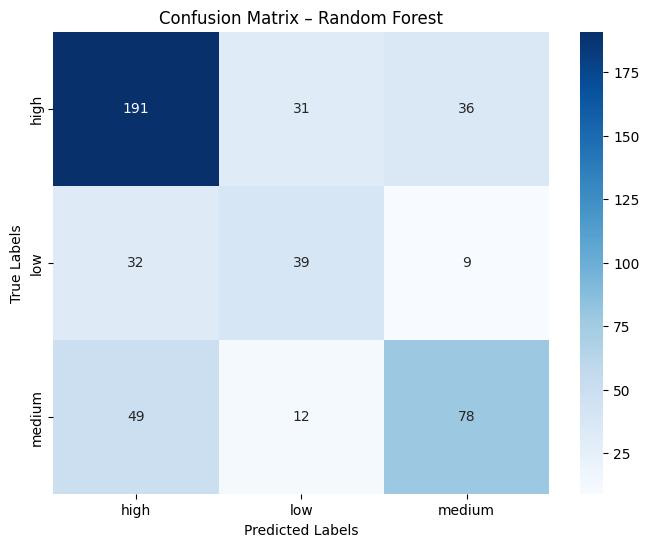


Classification Report:
              precision    recall  f1-score   support

        high       0.70      0.74      0.72       258
         low       0.48      0.49      0.48        80
      medium       0.63      0.56      0.60       139

    accuracy                           0.65       477
   macro avg       0.60      0.60      0.60       477
weighted avg       0.64      0.65      0.64       477



In [113]:
# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.4f}')

cm_rf = confusion_matrix(y_test, y_pred_rf)

class_labels = sorted(y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix – Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:")
print(report)

Feature Importance:
Index(['dp001_review_total_time', 'dp001_review_finish_rate',
       'dp001_prac_during_time', 'prac_date_afternoon', 'prac_date_evening',
       'prac_date_morning', 'review_start_time_afternoon',
       'review_start_time_evening', 'review_start_time_morning'],
      dtype='object')
[0.43915054 0.07567292 0.42971137 0.01077461 0.0078011  0.00987522
 0.00918835 0.00944079 0.00838511]


Text(0.5, 0, 'Importance')

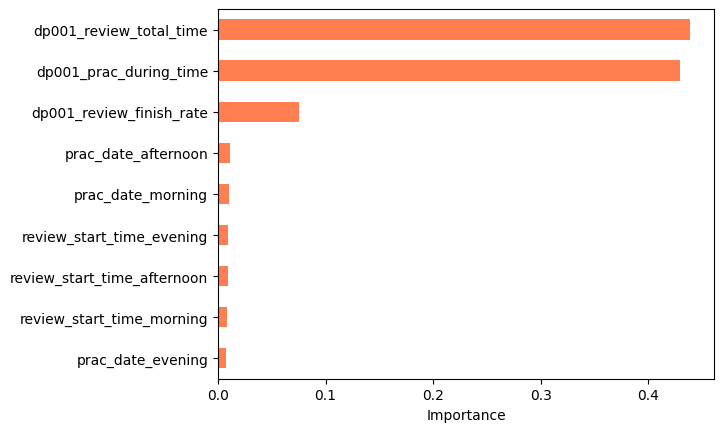

In [114]:
import matplotlib.pyplot as plt

# feature importance
print("Feature Importance:")
print(X_train.columns)
imp=rf_classifier.feature_importances_
print(imp)
importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True, inplace=True)
importances.plot.barh(color='coral')
plt.xlabel("Importance")

# RQ 2 - 練習分數與影片學習成效是否相關 ?

### Logistic Regression

In [115]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 假設資料已存於 unique_rows DataFrame 中
# unique_rows = pd.read_csv('your_data.csv') # 如果是從檔案讀取資料

# 選擇相關變數
X = unique_rows['dp001_prac_score_rate']  # 自變數 (連續變數)
y = unique_rows['dp001_exam_binary_res']  # 因變數 (二元變數)

# 檢查是否有缺失值並處理
unique_rows = unique_rows.dropna(subset=['dp001_prac_score_rate', 'dp001_exam_binary_res'])

# 增加常數項 (Statsmodels 需要)
X_const = sm.add_constant(X)

# 使用 Statsmodels 進行邏輯回歸分析
logit_model = sm.Logit(y, X_const)  # 建立模型
result = logit_model.fit()          # 訓練模型
print(result.summary())             # 輸出回歸結果

# 使用 sklearn 進行邏輯回歸
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.2, random_state=42)

# 初始化邏輯回歸模型
logreg = LogisticRegression()
logreg.fit(X_train, y_train)  # 訓練模型

# 預測測試集
y_pred = logreg.predict(X_test)

# 輸出分類報告與混淆矩陣
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.640596
         Iterations 4
                             Logit Regression Results                            
Dep. Variable:     dp001_exam_binary_res   No. Observations:                 2387
Model:                             Logit   Df Residuals:                     2385
Method:                              MLE   Df Model:                            1
Date:                   Tue, 24 Dec 2024   Pseudo R-squ.:                0.008398
Time:                           11:14:51   Log-Likelihood:                -1529.1
converged:                          True   LL-Null:                       -1542.1
Covariance Type:               nonrobust   LLR p-value:                 3.594e-07
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2387      0.087      2.747      0.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [116]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 假設資料已存於 unique_rows DataFrame 中
# unique_rows = pd.read_csv('your_data.csv') # 如果是從檔案讀取資料

# 選擇相關變數
# X = unique_rows['dp001_prac_score_rate'].values.reshape(-1, 1)  # 自變數 (連續變數)
X = unique_rows[['dp001_prac_score_rate']]
y = unique_rows['dp001_exam_binary_res']  # 因變數 (二元變數)

# 檢查是否有缺失值並處理
unique_rows = unique_rows.dropna(subset=['dp001_prac_score_rate', 'dp001_exam_binary_res'])

# **1. Statsmodels: 檢驗標準化係數**
# 標準化自變數
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns) # 將自變數標準化

# 增加常數項 (Statsmodels 需要)
X_const_standardized = sm.add_constant(X_standardized)

# 使用 Statsmodels 進行邏輯回歸分析
logit_model = sm.Logit(y, X_const_standardized)  # 建立模型
result = logit_model.fit()                       # 訓練模型
print("標準化後的 Statsmodels 結果:")
print(result.summary())                          # 輸出回歸結果

# **2. Sklearn: 訓練標準化模型並檢驗係數**
# 切分資料集
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# 初始化邏輯回歸模型
logreg = LogisticRegression()
logreg.fit(X_train, y_train)  # 訓練模型

# 輸出標準化後的回歸係數
print("\n標準化後的 Sklearn Logistic Regression 係數:")
print("Coefficient:", logreg.coef_)
print("Intercept:", logreg.intercept_)

# 預測測試集
y_pred = logreg.predict(X_test)

# 輸出分類報告與混淆矩陣
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.640596
         Iterations 4
標準化後的 Statsmodels 結果:
                             Logit Regression Results                            
Dep. Variable:     dp001_exam_binary_res   No. Observations:                 2387
Model:                             Logit   Df Residuals:                     2385
Method:                              MLE   Df Model:                            1
Date:                   Tue, 24 Dec 2024   Pseudo R-squ.:                0.008398
Time:                           11:14:51   Log-Likelihood:                -1529.1
converged:                          True   LL-Null:                       -1542.1
Covariance Type:               nonrobust   LLR p-value:                 3.594e-07
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.6357      0.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [117]:
input_x = unique_rows[['dp001_prac_score_rate', 'dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']]
input_x.head()

,dp001_prac_score_rate,dp001_review_total_time,dp001_review_finish_rate,dp001_prac_during_time
0,100.0,573.46,100.0,32.0
1,100.0,573.46,100.0,32.0
2,100.0,449.61,100.0,129.0
3,100.0,449.61,100.0,154.0
4,100.0,100.96,22.0,129.0


In [118]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# 選擇解釋變數和因變數
X = unique_rows[['dp001_prac_score_rate', 'dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']]
y = unique_rows['dp001_exam_binary_res']

# 處理缺失值
X = X.dropna()
y = y.loc[X.index]  # 確保 y 與 X 對應

# 標準化解釋變數
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# display(X.head())

# 增加常數項
X = sm.add_constant(X)

# 建立 Logistic Regression 模型
logit_model = sm.Logit(y, X).fit()

# 輸出回歸結果
print(logit_model.summary())

# 分割資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 sklearn Logistic Regression 模型進行預測
from sklearn.linear_model import LogisticRegression
sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)

# 預測測試集
y_pred = sklearn_model.predict(X_test)

# 計算 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# 輸出 Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Optimization terminated successfully.
         Current function value: 0.639346
         Iterations 6
                             Logit Regression Results                            
Dep. Variable:     dp001_exam_binary_res   No. Observations:                 2387
Model:                             Logit   Df Residuals:                     2382
Method:                              MLE   Df Model:                            4
Date:                   Tue, 24 Dec 2024   Pseudo R-squ.:                 0.01033
Time:                           11:14:51   Log-Likelihood:                -1526.1
converged:                          True   LL-Null:                       -1542.1
Covariance Type:               nonrobust   LLR p-value:                 2.035e-06
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.6374      0.043     14.69

### Random Forest

In [119]:
from sklearn.model_selection import train_test_split

# 自變數與因變數
X = unique_rows[['dp001_prac_score_rate', 'dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']]
y = unique_rows['dp001_exam_binary_res']

# 切分訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 建立 Random Forest 模型
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None, class_weight='balanced')
rf_model.fit(X_train, y_train)

# 預測測試集
y_pred = rf_model.predict(X_test)

# 評估模型
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 28 115]
 [141 194]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.17      0.20      0.18       143
         1.0       0.63      0.58      0.60       335

    accuracy                           0.46       478
   macro avg       0.40      0.39      0.39       478
weighted avg       0.49      0.46      0.48       478



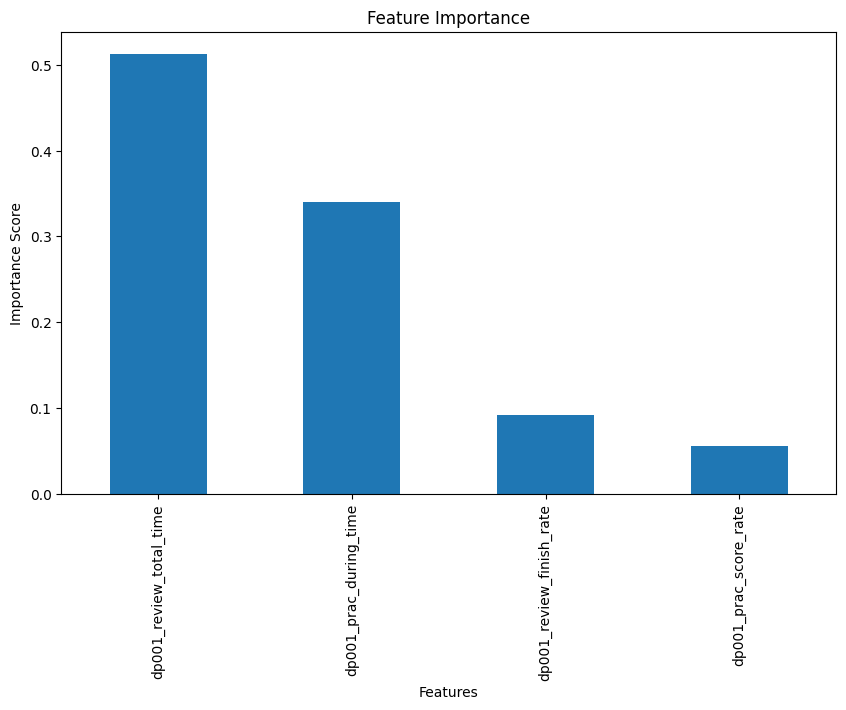

In [121]:
import matplotlib.pyplot as plt
import pandas as pd

# 獲取特徵重要性
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# 繪製特徵重要性條形圖
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()


### XGBoost

In [122]:
display(X_train.head())

,dp001_prac_score_rate,dp001_review_total_time,dp001_review_finish_rate,dp001_prac_during_time
792,100.0,132.96,50.0,21.0
2252,100.0,411.04,100.0,594.0
360,0.0,137.77,100.0,29.0
1433,50.0,301.05,100.0,111.0
1298,100.0,133.50,31.0,35.0


Confusion Matrix:
[[ 28 115]
 [ 96 239]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.23      0.20      0.21       143
         1.0       0.68      0.71      0.69       335

    accuracy                           0.56       478
   macro avg       0.45      0.45      0.45       478
weighted avg       0.54      0.56      0.55       478



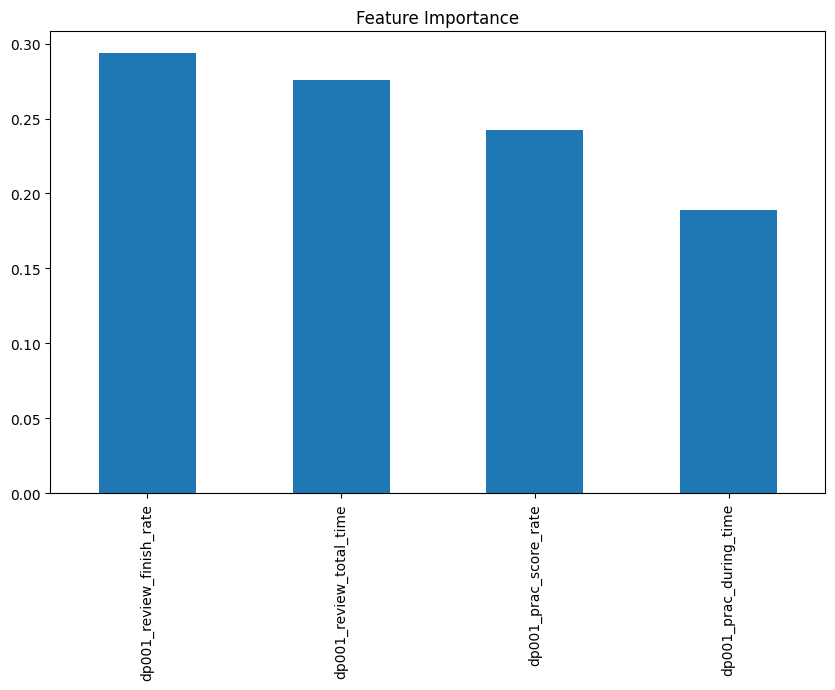

In [123]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 建立 XGBoost 模型
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# 預測
y_pred = xgb_model.predict(X_test)

# 評估
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 獲取特徵重要性
import matplotlib.pyplot as plt
import pandas as pd
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', title="Feature Importance", figsize=(10, 6))
plt.show()

### SVM

In [124]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 使用訓練集計算標準化參數
X_test_scaled = scaler.transform(X_test)        # 使用相同參數標準化測試集

# 3. 訓練 SVM 模型
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 4. 預測與評估
y_pred = svm_model.predict(X_test_scaled)

# 評估結果
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 80  63]
 [137 198]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.37      0.56      0.44       143
         1.0       0.76      0.59      0.66       335

    accuracy                           0.58       478
   macro avg       0.56      0.58      0.55       478
weighted avg       0.64      0.58      0.60       478



In [125]:
print(X_train.columns)

Index(['dp001_prac_score_rate', 'dp001_review_total_time',
       'dp001_review_finish_rate', 'dp001_prac_during_time'],
      dtype='object')


In [126]:
from sklearn.svm import LinearSVC
import pandas as pd

# 使用 L1 正則化的 Linear SVM
linear_svm = LinearSVC(C=1, penalty='l1', dual=False, random_state=42)
linear_svm.fit(X_train_scaled, y_train)

# 獲取特徵權重
feature_weights = pd.Series(linear_svm.coef_[0], index=X_train.columns)

# 遍歷並輸出特徵的重要性（按絕對值排序）
sorted_feature_weights = feature_weights.abs().sort_values(ascending=False)
print("Weights of Linear SVM:")
for feature, weight in sorted_feature_weights.items():  # 將 iteritems() 替換為 items()
    print(f"{feature}: {feature_weights[feature]:.4f}")


Weights of Linear SVM:
dp001_prac_score_rate: 0.0920
dp001_review_finish_rate: 0.0360
dp001_prac_during_time: 0.0105
dp001_review_total_time: 0.0098


### 中介變數檢驗

In [128]:
import statsmodels.api as sm
import numpy as np
from scipy.stats import norm

# 定義自變數列表
independent_vars = ['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']

# 定義因變數和中介變數
y = unique_rows['dp001_exam_binary_res']
M = unique_rows['dp001_prac_score_rate']

# 遍歷每個自變數
for var in independent_vars:
    print(f"\n--- 自變數: {var} ---")
    
    # Step 1: 自變數是否顯著影響因變數
    X1 = sm.add_constant(unique_rows[[var]])
    model1 = sm.Logit(y, X1).fit(disp=False)  # disp=False 禁止詳細輸出
    print("Step 1: 自變數對因變數的影響")
    print(model1.summary())
    
    # Step 2: 自變數是否顯著影響中介變數
    X2 = sm.add_constant(unique_rows[[var]])
    model2 = sm.OLS(M, X2).fit()
    print("\nStep 2: 自變數對中介變數的影響")
    print(model2.summary())
    
    # Step 3: 中介變數是否顯著，且加入後減弱自變數對因變數的影響
    X3 = sm.add_constant(unique_rows[[var, 'dp001_prac_score_rate']])
    model3 = sm.Logit(y, X3).fit(disp=False)
    print("\nStep 3: 中介變數對因變數的聯合影響")
    print(model3.summary())
    
    # Sobel Test
    a = model2.params[var]  # 自變數對中介變數的影響
    b = model3.params['dp001_prac_score_rate']  # 中介變數對因變數的影響
    SE_a = model2.bse[var]
    SE_b = model3.bse['dp001_prac_score_rate']
    
    sobel_z = (a * b) / np.sqrt((b**2 * SE_a**2) + (a**2 * SE_b**2))
    sobel_p = 2 * (1 - norm.cdf(abs(sobel_z)))
    
    print("\nSobel Test 結果:")
    print(f"Sobel Z-score: {sobel_z.round(2)}")
    print(f"P-value: {sobel_p.round(2)}")



--- 自變數: dp001_review_total_time ---
Step 1: 自變數對因變數的影響
                             Logit Regression Results                            
Dep. Variable:     dp001_exam_binary_res   No. Observations:                 2387
Model:                             Logit   Df Residuals:                     2385
Method:                              MLE   Df Model:                            1
Date:                   Tue, 24 Dec 2024   Pseudo R-squ.:               0.0005323
Time:                           11:16:47   Log-Likelihood:                -1541.2
converged:                          True   LL-Null:                       -1542.1
Covariance Type:               nonrobust   LLR p-value:                    0.2001
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5296      0.089      5.968      0.000       0.356       0.703
dp001_revie

In [129]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import numpy as np
from scipy.stats import norm

# 定義自變數列表
independent_vars = ['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']

# 定義因變數
y = unique_rows['dp001_exam_binary_res']

# 對中介變數進行標準化
scaler = StandardScaler()
M = scaler.fit_transform(unique_rows[['dp001_prac_score_rate']])  # 返回 NumPy 數組
M = M.flatten()  # 平展為一維數組，方便 Statsmodels 使用

# 遍歷每個自變數
for var in independent_vars:
    print(f"\n--- 自變數: {var} ---")
    
    # Step 1: 自變數是否顯著影響因變數
    X1 = sm.add_constant(unique_rows[[var]])
    model1 = sm.Logit(y, X1).fit(disp=False)  # disp=False 禁止詳細輸出
    print("Step 1: 自變數對因變數的影響")
    print(model1.summary())
    
    # Step 2: 自變數是否顯著影響中介變數
    X2 = sm.add_constant(unique_rows[[var]])
    model2 = sm.OLS(M, X2).fit()
    print("\nStep 2: 自變數對中介變數的影響")
    print(model2.summary())
    
    # Step 3: 中介變數是否顯著，且加入後減弱自變數對因變數的影響
    X3 = sm.add_constant(unique_rows[[var]])
    X3['dp001_prac_score_rate'] = M  # 使用標準化的中介變數
    model3 = sm.Logit(y, X3).fit(disp=False)
    print("\nStep 3: 中介變數對因變數的聯合影響")
    print(model3.summary())
    
    # Sobel Test
    a = model2.params[var]  # 自變數對中介變數的影響
    b = model3.params['dp001_prac_score_rate']  # 中介變數對因變數的影響
    SE_a = model2.bse[var]
    SE_b = model3.bse['dp001_prac_score_rate']
    
    sobel_z = (a * b) / np.sqrt((b**2 * SE_a**2) + (a**2 * SE_b**2))
    sobel_p = 2 * (1 - norm.cdf(abs(sobel_z)))
    
    print("\nSobel Test 結果:")
    print(f"Sobel Z-score: {sobel_z.round(2)}")
    print(f"P-value: {sobel_p.round(2)}")



--- 自變數: dp001_review_total_time ---
Step 1: 自變數對因變數的影響
                             Logit Regression Results                            
Dep. Variable:     dp001_exam_binary_res   No. Observations:                 2387
Model:                             Logit   Df Residuals:                     2385
Method:                              MLE   Df Model:                            1
Date:                   Tue, 24 Dec 2024   Pseudo R-squ.:               0.0005323
Time:                           11:16:50   Log-Likelihood:                -1541.2
converged:                          True   LL-Null:                       -1542.1
Covariance Type:               nonrobust   LLR p-value:                    0.2001
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5296      0.089      5.968      0.000       0.356       0.703
dp001_revie

### 調節變數：引入交互項

In [130]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd

# 定義調節變數列表
moderators = ['dp001_review_total_time', 'dp001_review_finish_rate', 'dp001_prac_during_time']

# 因變數
y = unique_rows['dp001_exam_binary_res']

# 對 moderators 和 dp001_prac_score_rate 進行標準化
scaler = StandardScaler()
unique_rows[moderators] = scaler.fit_transform(unique_rows[moderators])
unique_rows['dp001_prac_score_rate'] = scaler.fit_transform(unique_rows[['dp001_prac_score_rate']])

# 遍歷每個調節變數
for moderator in moderators:
    print(f"\n--- 調節變數: {moderator} ---")
    
    # 計算交互項
    unique_rows['interaction'] = unique_rows['dp001_prac_score_rate'] * unique_rows[moderator]
    
    # 定義自變數和交互項
    X = unique_rows[['dp001_prac_score_rate', moderator, 'interaction']]
    
    # 添加常數項
    X = sm.add_constant(X)
    
    # 建立邏輯回歸模型
    model = sm.Logit(y, X).fit(disp=False)  # disp=False 禁止詳細輸出
    
    # 輸出結果
    print(model.summary())



--- 調節變數: dp001_review_total_time ---
                             Logit Regression Results                            
Dep. Variable:     dp001_exam_binary_res   No. Observations:                 2387
Model:                             Logit   Df Residuals:                     2383
Method:                              MLE   Df Model:                            3
Date:                   Tue, 24 Dec 2024   Pseudo R-squ.:                0.008821
Time:                           11:16:52   Log-Likelihood:                -1528.5
converged:                          True   LL-Null:                       -1542.1
Covariance Type:               nonrobust   LLR p-value:                 5.330e-06
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.6362      0.043     14.687      0.000       0.551       0.721
dp001_prac_score_rate       0

### SEM

In [133]:
from semopy import Model, calc_stats

# 定義模型
model_description = """
dp001_exam_binary_res ~ dp001_prac_score_rate + dp001_review_total_time + dp001_review_finish_rate + dp001_prac_during_time
"""

# 建立 SEM 模型
model = Model(model_description)
model.fit(unique_rows)

# 打印模型結果
display(model.inspect().round(2))

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,dp001_exam_binary_res,~,dp001_prac_score_rate,0.05,0.01,5.04,0.00
1,dp001_exam_binary_res,~,dp001_review_total_time,0.00,0.01,0.10,0.92
2,dp001_exam_binary_res,~,dp001_review_finish_rate,0.02,0.01,2.12,0.03
3,dp001_exam_binary_res,~,dp001_prac_during_time,0.00,0.01,0.51,0.61
4,dp001_exam_binary_res,~~,dp001_exam_binary_res,0.22,0.01,34.55,0.00


In [134]:
# 計算模型擬合指標
stats = calc_stats(model)
display(stats)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,10,14,0.000641,1.0,542.689426,1.018913,0.999999,0.999998,0.999999,1.026479,0,9.999999,38.888963,2.685935e-07
